# Inference: Approximate Bayesian Computation (ABC) Rejection Sampling

This example shows you how to perform Approximate Bayesian Computation (ABC) rejection sampling on a time series from the stochastic degradation model.

In [1]:
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.StochasticDegradationModel()

# Create some toy data
real_parameters = model.suggested_parameters()
times = np.linspace(0, 10, 100)
values = model.simulate(real_parameters, times)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a uniform prior parameter
log_prior = pints.UniformLogPrior(
    [0.0],
    [0.3]
)

# Set the error measure to be used to compare simulated to observed data
error_measure = pints.RootMeanSquaredError(problem)

#### Fit using ABC rejection

In [2]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(1)

# set target number of samples
abc.set_n_target(200)

# log to screen
abc.set_log_to_screen(True)

# Run!
print('Running...')
samples = abc.run()
print('Done!')

Running...
Using Rejection ABC
Running in sequential mode.
Iter. Eval. Acceptance rate Time m:s
1     34     0.0294117647     0:00.0
2     138    0.0144927536     0:00.1
3     178    0.0168539326     0:00.1
20    1952   0.0102459016     0:00.6
40    3616   0.0110619469     0:01.2
60    5214   0.0115074799     0:01.7
80    7200   0.0111111111     0:02.4
100   8961   0.0111594688     0:03.0
120   10763  0.0111493078     0:03.6
140   12451  0.0112440768     0:04.1
160   14739  0.0108555533     0:04.9
180   17322  0.0103914098     0:05.7
200   20250  0.00987654321    0:06.8
Halting: target number of samples (200) reached.
Done!


#### Plot approximate posterior vs actual parameter value

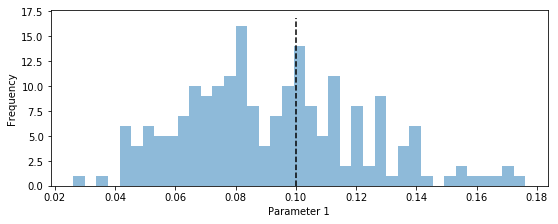

In [3]:
fig, _ = pints.plot.histogram([samples], ref_parameters=model.suggested_parameters())
fig.set_size_inches(8, 4)
plt.show()